In [554]:
import pandas as pd

In [555]:
#files to load
natural_gas_file="natural_gas_data.csv"
weather_state_file="ave_temp_by_state.csv"

In [556]:
nat_gas_csv= pd.read_csv(natural_gas_file)
state_weather_csv= pd.read_csv(weather_state_file)

In [557]:
gas_df = pd.DataFrame(nat_gas_csv)
gas_df.head()

,Unnamed: 0,Date,State,Natural Gas Consumption (MMcf)
0,0,Jan-10,Alabama,9202.647
1,1,Feb-10,Alabama,7762.261
2,2,Mar-10,Alabama,6612.051
3,3,Apr-10,Alabama,2987.217
4,4,May-10,Alabama,1142.784


In [558]:
weather_twenty_years= pd.DataFrame(state_weather_csv)
weather_twenty_years.head()

,Unnamed: 0,Date,State,Average Temperature,Anomaly
0,0,Jan-00,Alabama,46.5,1.6
1,1,Feb-00,Alabama,52.3,2.5
2,2,Mar-00,Alabama,58.9,2.7
3,3,Apr-00,Alabama,60.1,-3.8
4,4,May-00,Alabama,74.0,2.4


In [559]:
merge_df= pd.merge(weather_twenty_years,gas_df, how ="left", on =["Date","State"])
merge_df

,Unnamed: 0_x,Date,State,Average Temperature,Anomaly,Unnamed: 0_y,Natural Gas Consumption (MMcf)
0,0,Jan-00,Alabama,46.5,1.6,NaN,NaN
1,1,Feb-00,Alabama,52.3,2.5,NaN,NaN
2,2,Mar-00,Alabama,58.9,2.7,NaN,NaN
3,3,Apr-00,Alabama,60.1,-3.8,NaN,NaN
4,4,May-00,Alabama,74.0,2.4,NaN,NaN
...,...,...,...,...,...,...,...
11804,11804,Sep-19,Wyoming,56.7,0.1,6716.0,189.987
11805,11805,Oct-19,Wyoming,34.2,-8.9,6717.0,589.805
11806,11806,Nov-19,Wyoming,30.2,-0.9,6718.0,1847.274
11807,11807,Dec-19,Wyoming,23.0,1.4,6719.0,2073.947


In [560]:
null_drop = merge_df.dropna(how='any')
null_drop

,Unnamed: 0_x,Date,State,Average Temperature,Anomaly,Unnamed: 0_y,Natural Gas Consumption (MMcf)
120,120,Jan-10,Alabama,40.0,-4.9,0.0,9202.647
121,121,Feb-10,Alabama,40.6,-9.2,1.0,7762.261
122,122,Mar-10,Alabama,51.2,-5.0,2.0,6612.051
123,123,Apr-10,Alabama,64.2,0.3,3.0,2987.217
124,124,May-10,Alabama,73.3,1.7,4.0,1142.784
...,...,...,...,...,...,...,...
11804,11804,Sep-19,Wyoming,56.7,0.1,6716.0,189.987
11805,11805,Oct-19,Wyoming,34.2,-8.9,6717.0,589.805
11806,11806,Nov-19,Wyoming,30.2,-0.9,6718.0,1847.274
11807,11807,Dec-19,Wyoming,23.0,1.4,6719.0,2073.947


In [561]:
clean_merge= null_drop.drop(columns=['Unnamed: 0_x',"Unnamed: 0_y"])
clean_merge

,Date,State,Average Temperature,Anomaly,Natural Gas Consumption (MMcf)
120,Jan-10,Alabama,40.0,-4.9,9202.647
121,Feb-10,Alabama,40.6,-9.2,7762.261
122,Mar-10,Alabama,51.2,-5.0,6612.051
123,Apr-10,Alabama,64.2,0.3,2987.217
124,May-10,Alabama,73.3,1.7,1142.784
...,...,...,...,...,...
11804,Sep-19,Wyoming,56.7,0.1,189.987
11805,Oct-19,Wyoming,34.2,-8.9,589.805
11806,Nov-19,Wyoming,30.2,-0.9,1847.274
11807,Dec-19,Wyoming,23.0,1.4,2073.947


In [562]:
state_drop= clean_merge[clean_merge['Natural Gas Consumption (MMcf)']<=5000].index
gas_states=clean_merge.drop(state_drop)
gas_states

,Date,State,Average Temperature,Anomaly,Natural Gas Consumption (MMcf)
120,Jan-10,Alabama,40.0,-4.9,9202.647
121,Feb-10,Alabama,40.6,-9.2,7762.261
122,Mar-10,Alabama,51.2,-5.0,6612.051
131,Dec-10,Alabama,40.3,-9.0,7970.435
132,Jan-11,Alabama,41.1,-3.8,9951.178
...,...,...,...,...,...
11559,May-19,Wisconsin,51.8,-4.4,7050.223
11564,Oct-19,Wisconsin,45.0,-2.4,9003.976
11565,Nov-19,Wisconsin,28.2,-4.8,19033.545
11566,Dec-19,Wisconsin,23.5,1.4,21240.594


In [563]:
state_group= gas_states.groupby(clean_merge['State'])


In [564]:
state_ave = state_group['Natural Gas Consumption (MMcf)'].mean()


In [565]:
import numpy as np
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='State'>

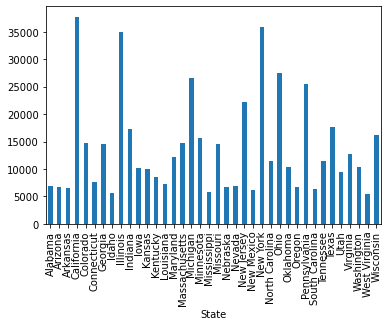

In [566]:
state_ave.plot(kind='bar', y='Natural Gas Consumption (MMcf)')

In [567]:
# Grouping States by Standard Federal Regions 

In [568]:
Region_I= gas_states.loc[(gas_states['State']== 'Connecticut') | (gas_states['State']== 'Massachusetts')]

In [569]:
Region_II= gas_states.loc[(gas_states['State']== 'New Jersey') | (gas_states['State']== 'New York')]

In [570]:
Region_III= gas_states.loc[(gas_states['State']== 'Maryland') | (gas_states['State']== 'Pennsylvania') | (gas_states['State']== 'Virginia') | (gas_states['State']== 'West Virginia')]

In [571]:
Region_IV= gas_states.loc[(gas_states['State']== 'Alabama') | (gas_states['State']== 'Georgia') | (gas_states['State']== 'Kentucky') | (gas_states['State']== 'Mississippi') |(gas_states['State']== 'North Carolina') |(gas_states['State']== 'South Carolina') | (gas_states['State']=='Tennessee')]

In [572]:
Region_V = gas_states.loc[(gas_states['State']== 'Illinois') | (gas_states['State']== 'Indiana') | (gas_states['State']=='Michigan') | (gas_states['State']=='Minnesota')| (gas_states['State']=='Ohio') |( gas_states['State']== 'Wisconsin')]

In [573]:
Region_VI=gas_states.loc[(gas_states['State']== 'Arkansas') | (gas_states['State']== 'Louisiana') | (gas_states['State']== 'New Mexico') | (gas_states['State']=='Oklahoma') |(gas_states['State']=='Texas')]

In [574]:
Region_VII=gas_states.loc[(gas_states['State']== 'Iowa') | (gas_states['State']== 'Kansas') |(gas_states['State']=='Missouri')]

In [575]:
Region_VIII=gas_states.loc[(gas_states['State']== 'Colorado') | (gas_states['State']== 'Utah')]

In [576]:
Region_IX=gas_states.loc[(gas_states['State']== 'Arizona') | (gas_states['State']== 'California')]

In [577]:
Region_X= gas_states.loc[(gas_states['State']== 'Idaho') | (gas_states['State']== 'Oregon') | (gas_states['State']=='Washington')]

In [578]:
reg_I_gas= Region_I['Natural Gas Consumption (MMcf)'].mean()
print(reg_I_gas)

12245.1342051282


In [579]:
reg_II_gas= Region_II['Natural Gas Consumption (MMcf)'].mean()
print(reg_II_gas)

29755.519713636375


In [580]:

reg_II_gas= Region_II['Natural Gas Consumption (MMcf)'].mean()
reg_III_gas= Region_III['Natural Gas Consumption (MMcf)'].mean()
reg_IV_gas= Region_IV['Natural Gas Consumption (MMcf)'].mean()
reg_V_gas= Region_V['Natural Gas Consumption (MMcf)'].mean()
reg_VI_gas= Region_VI['Natural Gas Consumption (MMcf)'].mean()
reg_VII_gas= Region_VII['Natural Gas Consumption (MMcf)'].mean()
reg_VIII_gas= Region_VIII['Natural Gas Consumption (MMcf)'].mean()
reg_IX_gas= Region_IX['Natural Gas Consumption (MMcf)'].mean()
reg_X_gas= Region_X['Natural Gas Consumption (MMcf)'].mean()

In [581]:
region_data= pd.DataFrame({'I': [reg_I_gas],
               'II': [reg_II_gas],
               'III': [reg_III_gas],
               'IV': [reg_IV_gas],
               'V': [reg_V_gas],
               'VI': [reg_VI_gas],
               'VII': [reg_VII_gas],
               'VIII': [reg_VIII_gas],
               'IX': [reg_IX_gas],
               'X': [reg_X_gas]})

In [582]:
region_data.head()

,I,II,III,IV,V,VI,VII,VIII,IX,X
0,12245.134205,29755.519714,17591.317564,10781.670837,24545.68168,12610.59544,11773.560352,12660.356955,32088.449081,8753.327469


In [583]:
T_region_data=region_data.T

Text(0, 0.5, 'MMcf')

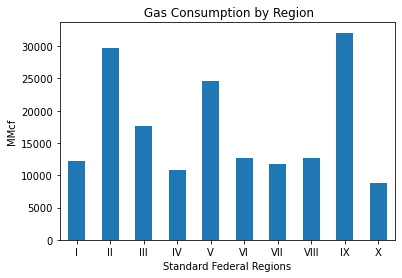

In [590]:
region_graph=T_region_data.plot.bar(legend=False, title =" Gas Consumption by Region", rot=0)
region_graph.set_xlabel("Standard Federal Regions")
region_graph.set_ylabel("MMcf")


In [ ]:
#Region IX: Arizona, California, Hawaii, Nevada, American Samoa, Guam, Northern Mariana Islands most consumption
#Region X: Alaska, Idaho, Oregon, Washington least consumption